<a href="https://colab.research.google.com/github/dfridland/PyTorch/blob/HW8/PyTorchLesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset =  datasets.MNIST(
    '.',
    train=True,
    download = True, 
    transform=transform
)


100%|██████████| 9912422/9912422 [00:00<00:00, 10043956.20it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 18865549.58it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39823173.33it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10275366.11it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



 Distance between classes in pixels 3 and 1
0.08597984164953232


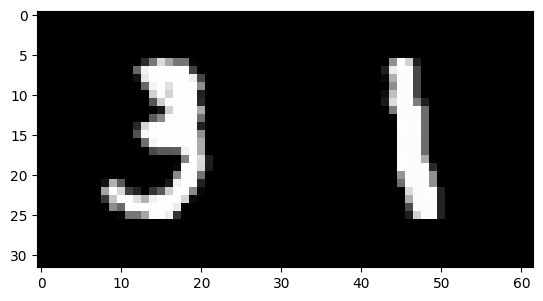

In [14]:
img_1, label_1 = dataset[10]
img_2, label_2 = dataset[6]

print(f' Distance between classes in pixels {label_1} and {label_2}')
print(torch.mean(torch.square(img_1 - img_2)).item())

grid = torchvision.utils.make_grid([img_1, img_2])
plt.imshow(grid.permute(1,2,0));                 


 Distance between classes in pixels 3 and 3
0.11974499374628067


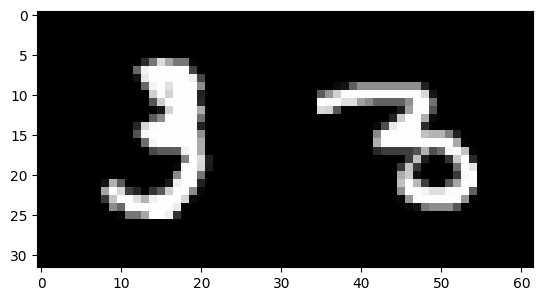

In [15]:
img_3, label_3 = dataset[30]

print(f' Distance between classes in pixels {label_1} and {label_3}')
print(torch.mean(torch.square(img_1 - img_3)).item())

grid = torchvision.utils.make_grid([img_1, img_3])
plt.imshow(grid.permute(1,2,0));   

In [35]:
class TinyModel(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3)
    self.pool = nn.MaxPool2d(kernel_size=2)
    self.relu = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=4,
                           out_channels=8,
                           kernel_size=3)
    self.fc1= nn.Linear(in_features=200,
                        out_features=128) 
    self.fc2= nn.Linear(in_features=128,
                        out_features=num_classes)
    
  def forward(self, x):
      x = self.conv1(x)
      x = self.pool(x)
      x = self.relu(x)
      x = self.conv2(x)
      x = self.pool(x)
      x = self.relu(x)
      x = x.reshape((-1, 200))
      emb = self.fc1(x)
      x = self.fc2(emb)
      return x, emb

In [36]:
def train(model, dataloader):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  model.to(device)
  for step, (imgs, labels) in enumerate(dataloader):
    imgs, labels = imgs.to(device), labels.to(device)
    pred, _ = model(imgs)
    loss = criterion(pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 100 == 0:
      print(f'Loss is {loss.item()}')
  return model  

In [37]:
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=256,
    shuffle=True
)

In [44]:
model = TinyModel(10)
model = train(model, dataloader)

Loss is 2.308699607849121
Loss is 0.3206958472728729
Loss is 0.2836597263813019


In [45]:
model.to('cpu')
_, emb_1 = model(img_1[None])
_, emb_2 = model(img_2[None])
_, emb_3 = model(img_3[None])

In [46]:
print(f'The distance between classes {label_1} and {label_2}')
print(torch.mean(torch.square(emb_1 - emb_2)). item())

print(f'The distance between classes {label_1} and {label_3}')
print(torch.mean(torch.square(emb_1 - emb_3)). item())

The distance between classes 3 and 1
1.282254695892334
The distance between classes 3 and 3
0.5822452306747437
